,scenario,confidentiality_pct,avg_latency_ms,energy_mJ_total,total_msgs,intercepted,eav_detect_rate
0,System1_Vulnerable,0.00,20.00,12.00,300,300,NaN
1,System2_Secure,96.67,13.01,6.36,300,10,12.33


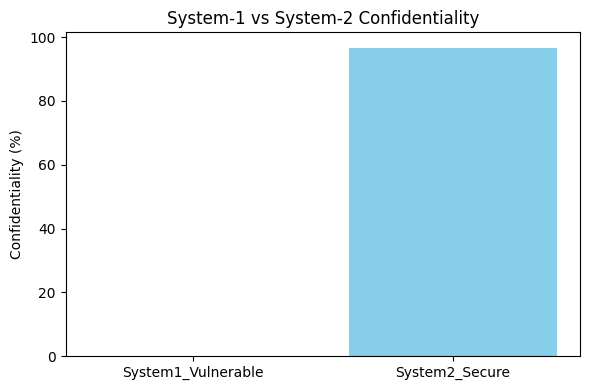

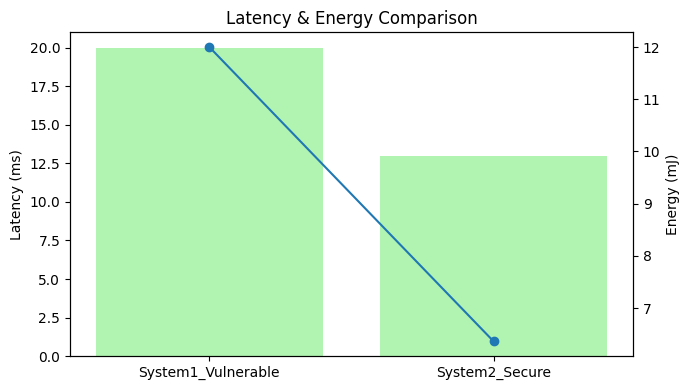

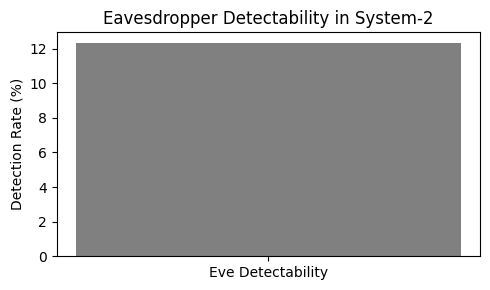

✅ Plots saved to docs/figures/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Try current dir; if no /results here, use parent as project root
root = Path.cwd()
if not (root / 'results').exists():
    root = root.parent

s1 = pd.read_csv(root / 'results' / 'summary_vulnerable.csv')
s2 = pd.read_csv(root / 'results' / 'summary_secure.csv')

df = pd.concat([s1, s2], ignore_index=True)
display(df)

# --- Confidentiality Comparison ---
plt.figure(figsize=(6,4))
plt.bar(df['scenario'], df['confidentiality_pct'], color=['salmon','skyblue'])
plt.ylabel('Confidentiality (%)')
plt.title('System-1 vs System-2 Confidentiality')
plt.tight_layout()
plt.savefig(root / 'docs' / 'figures' / 'confidentiality_compare.png', dpi=200)
plt.show()

# --- Latency & Energy ---
fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()
ax1.bar(df['scenario'], df['avg_latency_ms'], color='lightgreen', alpha=0.7, label='Latency (ms)')
ax2.plot(df['scenario'], df['energy_mJ_total'], marker='o', label='Energy (mJ)')
ax1.set_ylabel('Latency (ms)')
ax2.set_ylabel('Energy (mJ)')
plt.title('Latency & Energy Comparison')
fig.tight_layout()
plt.savefig(root / 'docs' / 'figures' / 'latency_energy.png', dpi=200)
plt.show()

# --- Detectability (System-2 only) ---
if 'eav_detect_rate' in s2.columns:
    plt.figure(figsize=(5,3))
    plt.bar(['Eve Detectability'], [s2['eav_detect_rate'].iloc[0]], color='gray')
    plt.ylabel('Detection Rate (%)')
    plt.title('Eavesdropper Detectability in System-2')
    plt.tight_layout()
    plt.savefig(root / 'docs' / 'figures' / 'detectability.png', dpi=200)
    plt.show()

print('✅ Plots saved to docs/figures/')
